# Analysis App Store Strategy Games

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
plt.rcParams['figure.figsize'] = [10,5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('appstore_games.csv')
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [4]:
def summary_dataframe(df):
    desc = pd.DataFrame(df.dtypes).reset_index()
    desc.columns = ['Column', 'Data Type']
    desc['Unique'] = [df[col].nunique() for col in desc['Column'].values]
    desc['Missing'] = [df[col].isnull().sum() for col in desc['Column'].values]
    desc['Missing (%)'] = round(desc['Missing'] / len(df) * 100, 2)
    desc['First Values'] = [df[col][0] for col in desc['Column'].values]
    desc['Last Values'] = [df[col][len(df)-1] for col in desc['Column'].values]
    
    return desc

In [5]:
summary_dataframe(games)

,Column,Data Type,Unique,Missing,Missing (%),First Values,Last Values
0,URL,object,16847,0,0.00,https://apps.apple.com/us/app/sudoku/id284921427,https://apps.apple.com/us/app/the-three-kingdo...
1,ID,int64,16847,0,0.00,284921427,1475076711
2,Name,object,16847,0,0.00,Sudoku,The Three Kingdoms :Bomb
3,Subtitle,object,5010,11746,69.07,NaN,NaN
4,Icon URL,object,16847,0,0.00,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...
5,Average User Rating,float64,9,9446,55.54,4,NaN
6,User Rating Count,float64,1792,9446,55.54,3553,NaN
7,Price,float64,24,24,0.14,2.99,0
8,In-app Purchases,object,3803,9324,54.82,NaN,NaN
9,Description,object,16473,0,0.00,"Join over 21,000,000 of our fans and download ...",The protagonist uses the method of placing a b...


In [6]:
games = games.drop_duplicates().reset_index(drop=True)
games.drop(['URL','ID'], axis=1, inplace=True)

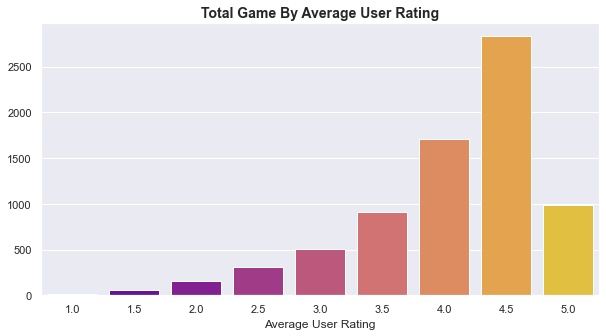

In [8]:
sns.countplot(games['Average User Rating'], palette='plasma')
plt.title('Total Game By Average User Rating', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

Observation : Games with rating **4.5 is dominant**.

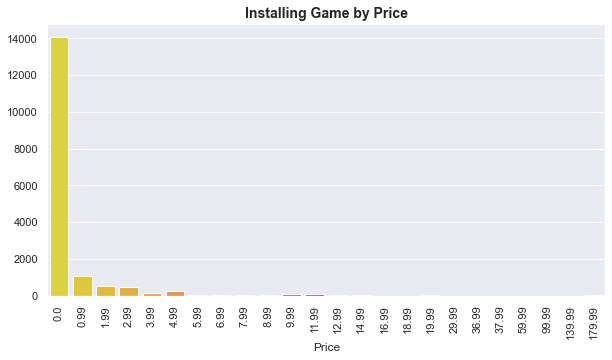

In [9]:
sns.countplot(games['Price'], palette='plasma_r')
plt.title('Installing Game by Price', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

Observation : Almost all game is **FREE** to install it.

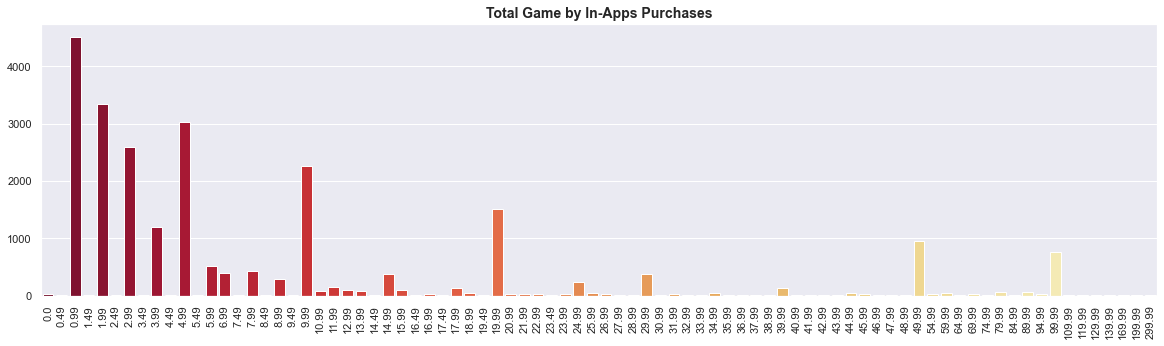

In [11]:
games_in_apps = games['In-app Purchases'].dropna().apply(lambda x: ','.join(list(set(str(x).split(', ')))))
games_in_apps = games_in_apps.str.get_dummies(',').sum()
games_in_apps.index = games_in_apps.index.astype('float')
games_in_apps.sort_index(inplace=True)

plt.figure(figsize=(20,5))
sns.barplot(x = games_in_apps.index, y = games_in_apps, palette='YlOrRd_r', ci=None)
plt.title('Total Game by In-Apps Purchases', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Observation : I think in-game purchasing is spread from **0.99, 1.99, 2.99, 4.99, 9.99, 19.99, 49.99, 99.99** (in dollars).

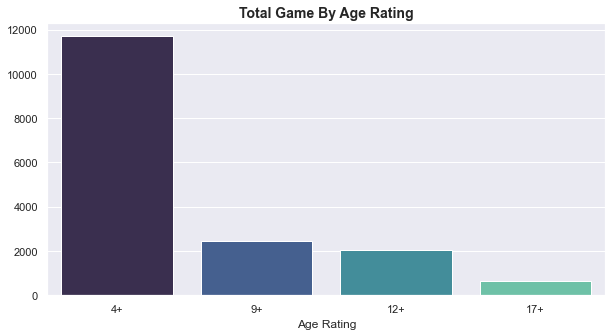

In [12]:
sns.countplot(games['Age Rating'], palette='mako')
plt.title('Total Game By Age Rating', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

Observation : Almost all games is rated by **Age 4+**.

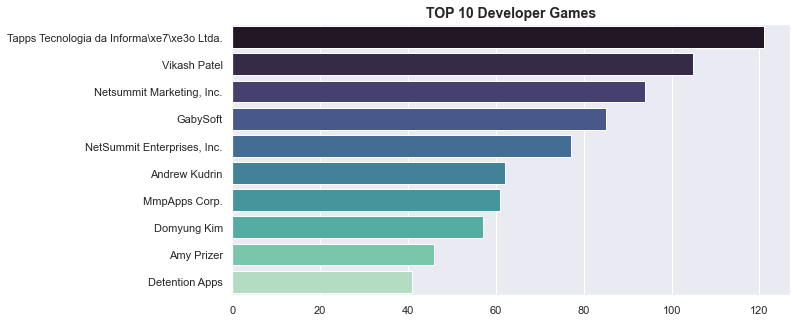

In [35]:
games_dev = games['Developer'].value_counts()[:10]
sns.barplot(x=games_dev, y=games_dev.index, palette='mako')
plt.title('TOP 10 Developer Games', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.show()

Observation : Around 120 games developed by **Tapps Tecnologia Informa, Ltd**.

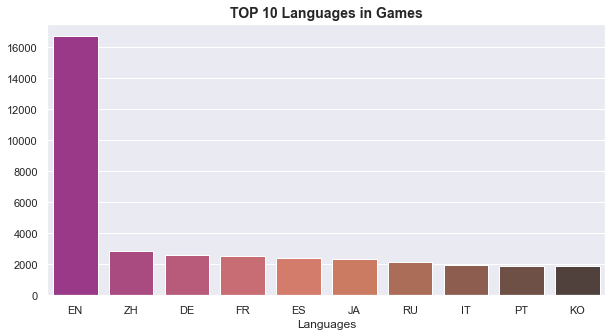

In [36]:
games_lang = games['Languages'].str.get_dummies(', ').sum().sort_values(ascending=False)[:10]
sns.barplot(x=games_lang.index, y=games_lang, palette='plasma_d')
plt.title('TOP 10 Languages in Games', fontsize=14, fontweight='bold')
plt.xlabel('Languages')
plt.ylabel('')
plt.show()

Observation : Almost all games are using **English Language**.

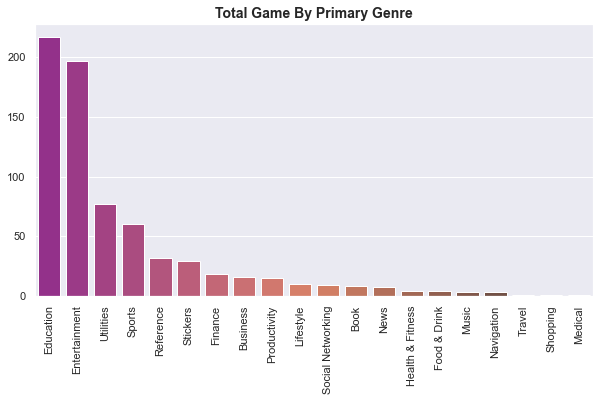

In [45]:
sns.barplot(x=games['Primary Genre'].value_counts()[1:].index, y=games['Primary Genre'].value_counts()[1:],
            palette='plasma_d')
plt.title('Total Game By Primary Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

Observation : Many games have primary genre **Education and then Entertaiment** second.

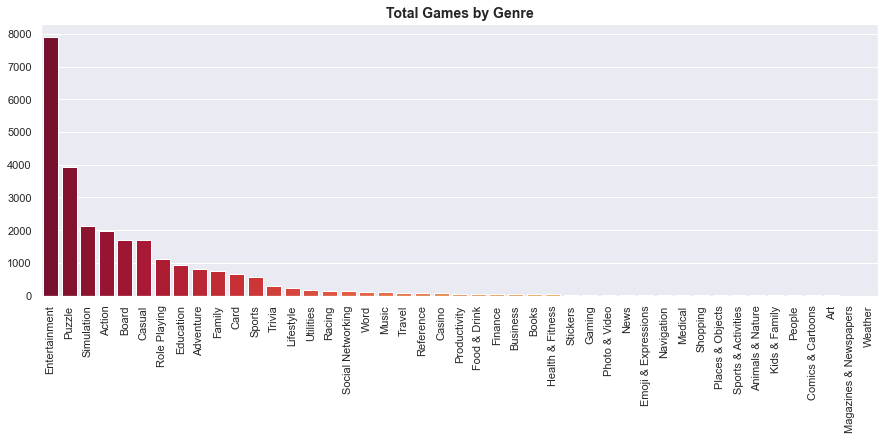

In [39]:
games_genre= games['Genres'].str.get_dummies(', ').sum().sort_values(ascending=False)[2:]
plt.figure(figsize=(15,5))
sns.barplot(x=games_genre.index, y=games_genre, palette='YlOrRd_r')
plt.title('Total Games by Genre', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()

Observation : Many games having genre **Entertaiment and Puzzle**.

In [40]:
def weighted_rating(df):
    g_score = df['Average User Rating'] * df['User Rating Count'] / df['User Rating Count'].sum()
    
    return g_score

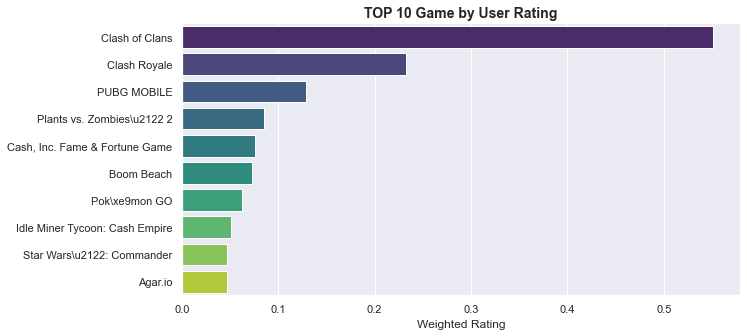

In [41]:
games_user_rating = games[['Name','Average User Rating','User Rating Count']].dropna()
games_user_rating['Weighted Rating'] = weighted_rating(games_user_rating)
top10_WR = games_user_rating.sort_values(by='Weighted Rating', ascending=False)[:10]

sns.barplot(data=top10_WR, x='Weighted Rating', y='Name', palette='viridis')
plt.title('TOP 10 Game by User Rating', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

Observation : **Clash of Clans** is most popular game.

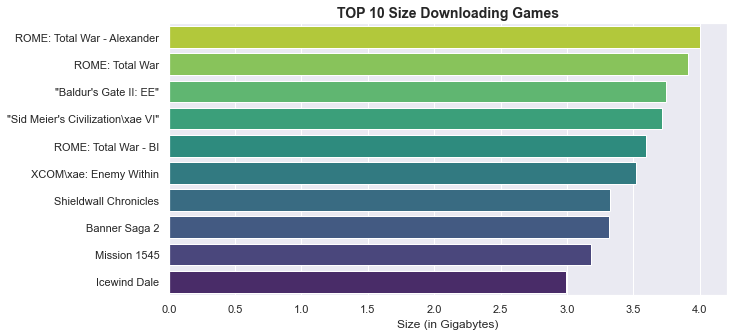

In [43]:
games_size = games[['Name','Size']].sort_values('Size', ascending=False)[:10]
sns.barplot(y=games_size['Name'], x=games_size['Size']/10e8, palette='viridis_r')
plt.title('TOP 10 Size Downloading Games', fontsize=14, fontweight='bold')
plt.xlabel('Size (in Gigabytes)')
plt.ylabel('')
plt.show()

Observation : **ROME: Total War-Alexander** is most big size game to install it.

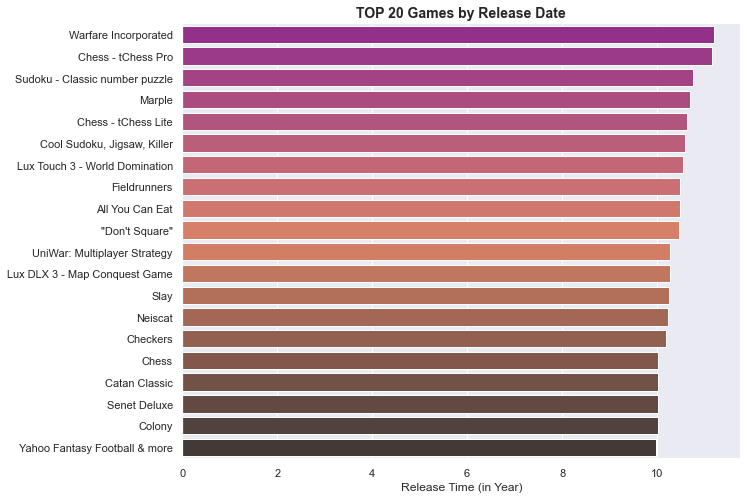

In [51]:
games_date = games[['Name','Original Release Date','Current Version Release Date']]
games_date['Original Release Date'] = pd.to_datetime(games_date['Original Release Date'])
games_date['Current Version Release Date'] = pd.to_datetime(games_date['Current Version Release Date'])
games_date['Diff Date'] = np.abs((games_date['Current Version Release Date'] - games_date['Original Release Date']).dt.days)
games_date = games_date.sort_values(by='Diff Date', ascending=False)[:20]

plt.figure(figsize=(10,8))
sns.barplot(x=games_date['Diff Date'] / 365, y=games_date['Name'], palette='plasma_d')
plt.title('TOP 20 Games by Release Date', fontsize=14, fontweight='bold')
plt.xlabel('Release Time (in Year)')
plt.ylabel('')
plt.show()

Observation : Warfare Incorporated and Chess Pro are most release time with **11+ years** after launching that game.